# Exploratory Data Analysis
## Roles to Explore:

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filter for UY Data Analyst roles 

In [2]:
df_DA_UY = df[(df['job_country'] == 'Uruguay') & (df['job_title_short'] == 'Data Analyst')]

Transforming some of the data to better suit the example.

In [14]:
df_DA_UY_Clean = df_DA_UY.copy().reset_index()
df_DA_UY_Clean['job_location'] = df_DA_UY_Clean['job_location'].replace({
    'Uruguay': 'Anywhere',
    'Montevideo, Montevideo Department, Uruguay': 'Montevideo Department, Uruguay',
    'Poblado Uruguay, Cerro Largo Department, Uruguay': 'Cerro Largo Department, Uruguay'
})

# Replacing a value just to have the same label's length below
df_DA_UY_Clean.loc[1, 'job_health_insurance'] = True
df_DA_UY_Clean

0       True
1      False
2      False
3       True
4       True
       ...  
222    False
223     True
224    False
225     True
226    False
Name: job_no_degree_mention, Length: 227, dtype: bool

In [ ]:
df_DA_UY_Clean['job_health_insurance']

<function matplotlib.pyplot.show(close=None, block=None)>

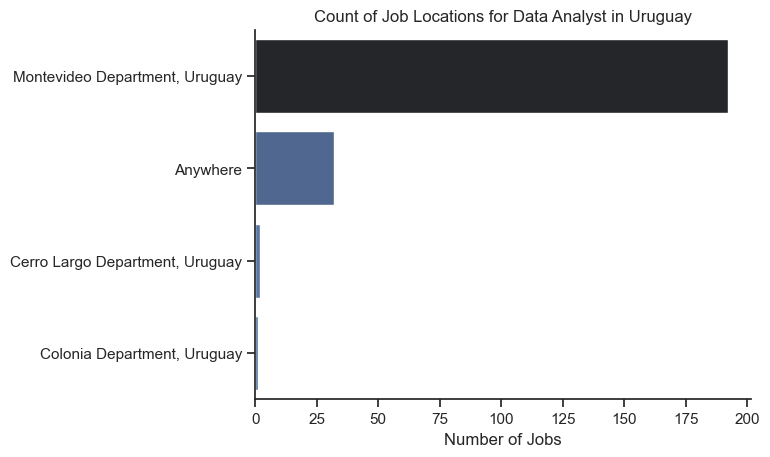

In [7]:
df_plot = df_DA_UY_Clean['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count of Job Locations for Data Analyst in Uruguay')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show

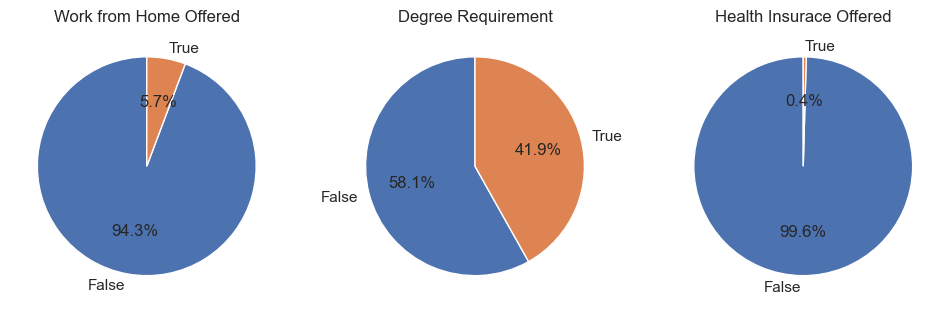

In [15]:
# Rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurace Offered'
}

fig, ax =plt.subplots(1, 3)
fig.set_size_inches(12, 5)

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_UY_Clean[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

# plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

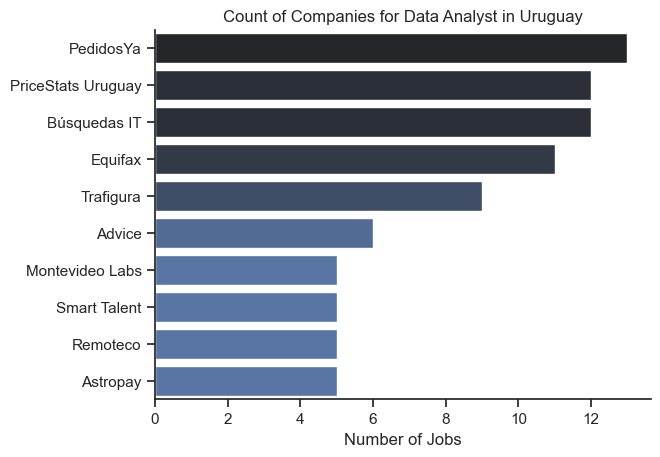

In [16]:
df_plot = df_DA_UY_Clean['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count of Companies for Data Analyst in Uruguay')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show